## SVM Application 
Dataset : https://www.kaggle.com/lodetomasi1995/income-classification <br>
## Income classification
Prediction task is to determine whether a person makes over 50K a year.

In [2]:
# Imporint packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
incomeDF = pd.read_csv("Data/income_evaluation.csv")
incomeDF

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
# Checking Null counts
incomeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# Describing the data
incomeDF.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [6]:
incomeDF.columns
# Column names contains a space before them, we need to remove it

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [7]:
new_cols = [column.replace(' ','') for column in incomeDF.columns]
new_cols = [column.replace('-','_') for column in new_cols]
incomeDF.columns=new_cols
incomeDF.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [8]:
# Remove unwanted coulms from dataframe
incomeDF.drop(columns='fnlwgt',inplace=True)

In [9]:
#checking for null values
incomeDF.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

## Data Preprocessing
Adding new columns in our dataset

In [10]:
# adding new the categorical column
bins = [16, 24, 64, 90]
labels = ["young","adult","old"]
incomeDF['age_types'] = pd.cut(incomeDF['age'], bins=bins, labels=labels)
incomeDF['income_num'] = np.where(incomeDF['income'] == ' >50K', 1, 0).astype('int16')

In [11]:
# Checking all the unique values of all the columns in the dataframe
for column in incomeDF.columns:
    print(column)
    print(np.unique(incomeDF[column]))

age
[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 90]
workclass
[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
education
[' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']
education_num
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
marital_status
[' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']
occupation
[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tec

Stripping all the spaces of the columns using str.strip() function

In [12]:
strip_columns = ['workclass', 'education','marital_status',
       'occupation', 'relationship', 'race', 'sex','native_country', 'income']
for cols in strip_columns:
    incomeDF[cols] = incomeDF[cols].str.strip()

Finding Categorical Values and Numerical Values

In [13]:
categorical = [var for var in incomeDF.columns if incomeDF[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [14]:
numerical = [var for var in incomeDF.columns if incomeDF[var].dtype=='int64']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :\n\n', numerical)

There are 5 numerical variables

The numerical variables are :

 ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [15]:
for var in categorical: 
    print(var)
    print(incomeDF[var].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec

Now, we can see that there are several columns like workclass, occupation and native_country which contain missing values. Let's recheck it with the 'loc' operator.

In [16]:
incomeDF.loc[incomeDF['workclass']=='?']

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_types,income_num
27,54,?,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K,adult,1
61,32,?,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K,adult,0
69,25,?,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K,adult,0
77,67,?,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K,old,0
106,17,?,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K,young,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K,adult,1
32531,30,?,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K,adult,0
32539,71,?,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K,old,1
32541,41,?,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K,adult,0


In [17]:
incomeDF.loc[incomeDF['workclass']=='?', 'workclass']= np.NaN
#another approach
#incomeDF['workclass'].replace(' ?', np.NaN, inplace=True)

incomeDF.loc[incomeDF['occupation']=='?', 'occupation']= np.NaN
#another approach
#incomeDF['occupation'].replace(' ?', np.NaN, inplace=True)

incomeDF.loc[incomeDF['native_country']=='?', 'native_country']= np.NaN
#another approach
#incomeDF['native_country'].replace(' ?', np.NaN, inplace=True)

In [18]:
incomeDF.isnull().sum()

age                  0
workclass         1836
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
age_types            0
income_num           0
dtype: int64

In [19]:
incomeDF.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_types,income_num
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,adult,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,adult,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,adult,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,adult,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,adult,0


## Data Visualization
Income is our target variable, let's visualize it

In [20]:
incomeDF['income'].value_counts()/len(incomeDF)

<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64

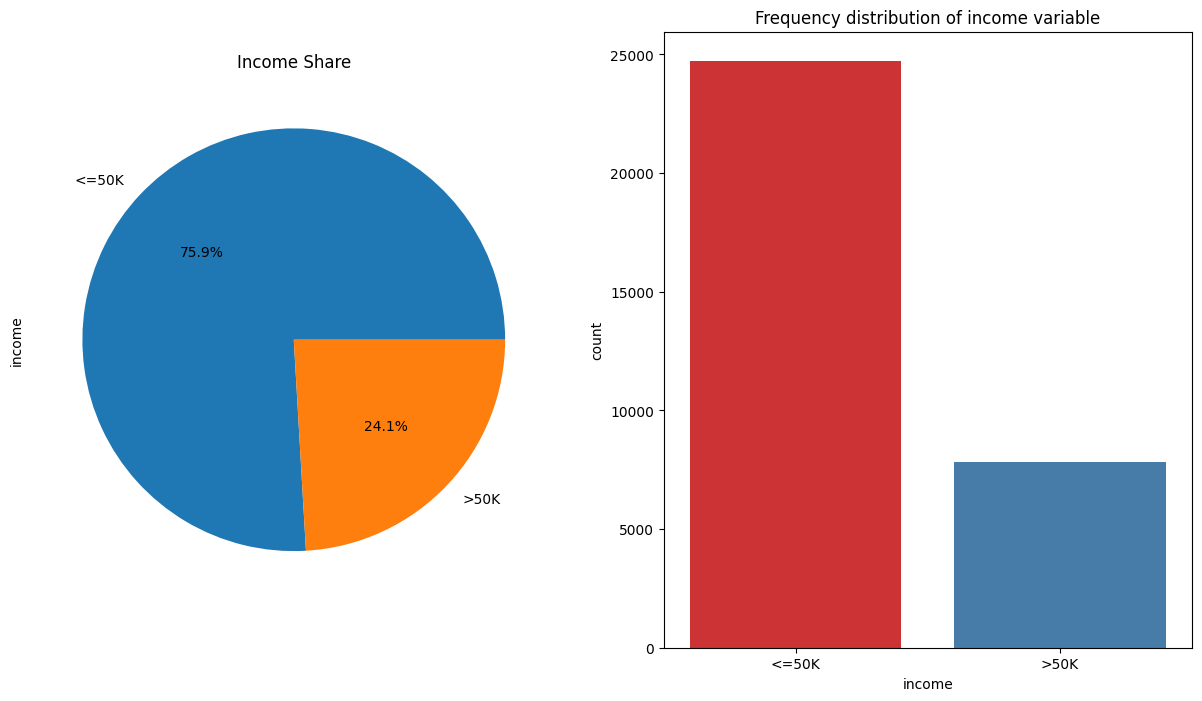

In [21]:
f,ax=plt.subplots(1,2,figsize=(15,8))

ax[0] = incomeDF['income'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=False)
ax[0].set_title('Income Share')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="income", data=incomeDF, palette="Set1")
ax[1].set_title("Frequency distribution of income variable")

plt.show()

In [22]:
df = incomeDF
more_than_50 = df[df['income'] == '>50K']
less_than_50 = df[df['income'] == '<=50K']
print (more_than_50.shape,less_than_50.shape)

(7841, 16) (24720, 16)


Since it is highy imbalanced the machine learning algorithm we use may get biased towards this kind of output (whichever having the higher number of outputs). We will try to balance this dataset later

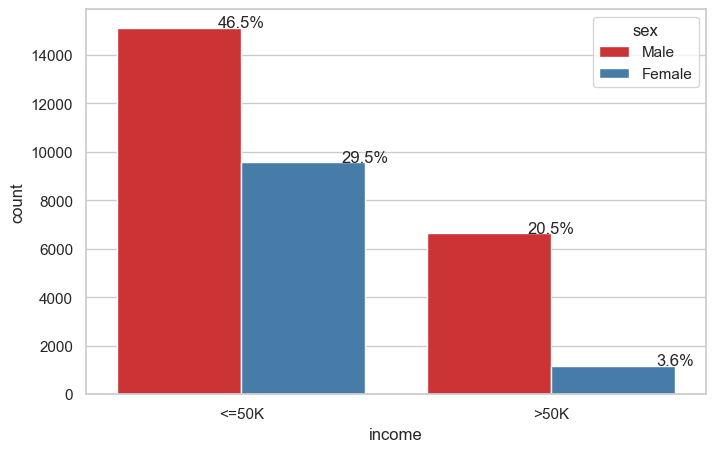

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sns.countplot(x="income", hue="sex", data=df,palette='Set1')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

Male's seems to earn more than female in both the income categories

In [24]:
incomeDF.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income',
       'age_types', 'income_num'],
      dtype='object')

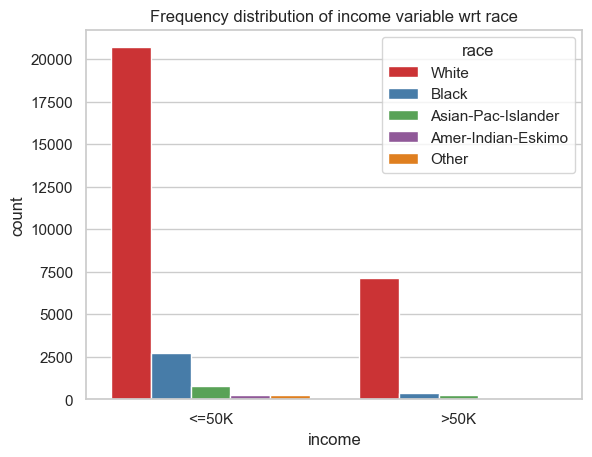

In [25]:
#f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="income", hue="race", data=df, palette="Set1")
ax.set_title("Frequency distribution of income variable wrt race")
plt.show()

We can see that whites make more money than non-whites in both the income categories.

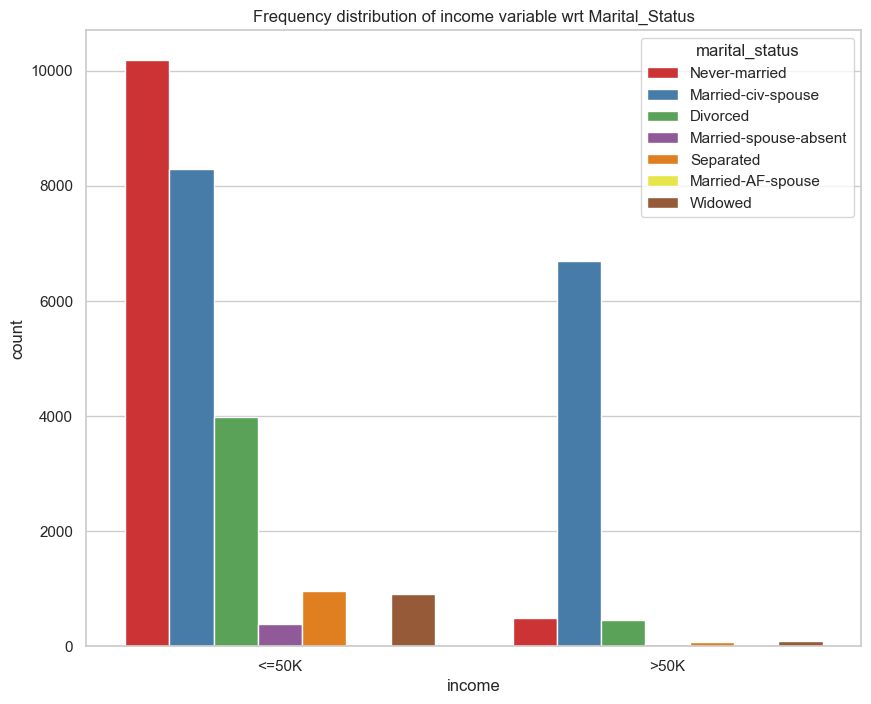

In [26]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="income", hue="marital_status", data=df, palette="Set1")
ax.set_title("Frequency distribution of income variable wrt Marital_Status")
plt.show()

## Interpretation
People who are not married earn less than 50k whereas people who are married earn more. Maybe because married people have a partner who keeps them motivated

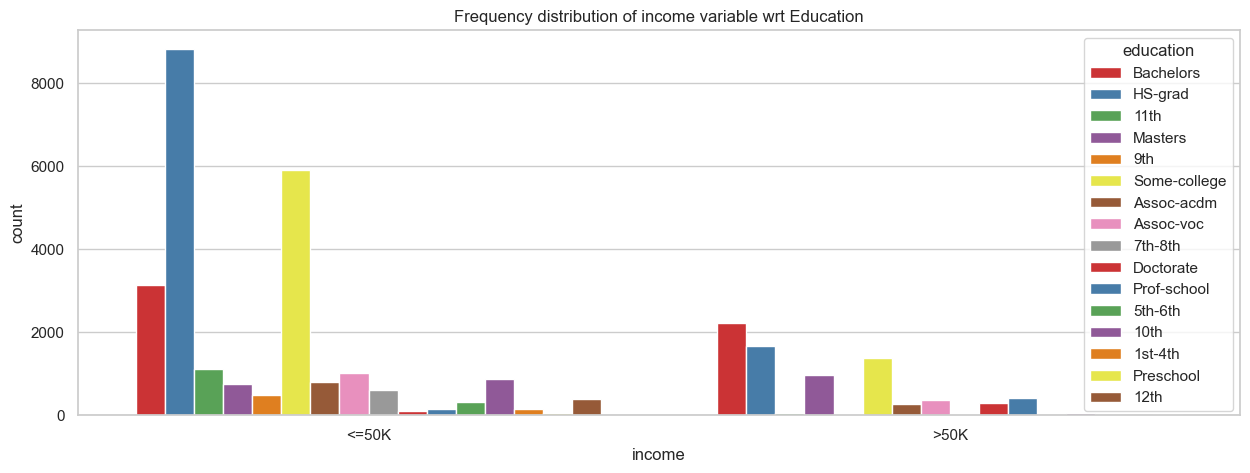

In [27]:
f, ax = plt.subplots(figsize=(15, 5))
ax = sns.countplot(x="income", hue="education", data=df, palette="Set1")
ax.set_title("Frequency distribution of income variable wrt Education")
plt.show()

We see people who have done masters are earning less than students who have just cleared their high school which is not normal. Let's try to observe more on these people

In [28]:
temp_2 = df.loc[(df['income']=='>50K') & (df['education'] == 'HS-grad')]

<AxesSubplot:xlabel='marital_status', ylabel='count'>

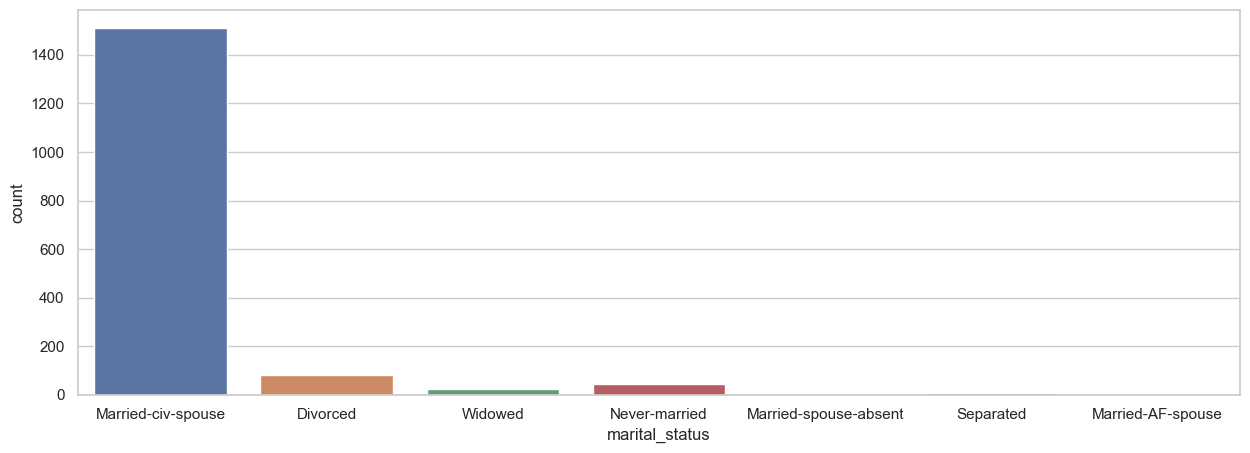

In [29]:
plt.figure(figsize=(15,5))
sns.countplot(x='marital_status',data=temp_2)

In [30]:
df.loc[(df['income']=='>50K') & (df['education'] == 'Masters')]

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_types,income_num
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,adult,1
19,43,Self-emp-not-inc,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K,adult,1
100,76,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K,old,1
135,38,Federal-gov,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,Iran,>50K,adult,1
164,45,Self-emp-not-inc,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,>50K,adult,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32457,33,Private,Masters,14,Married-civ-spouse,Tech-support,Husband,Asian-Pac-Islander,Male,0,0,50,United-States,>50K,adult,1
32480,41,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K,adult,1
32504,50,Private,Masters,14,Divorced,Sales,Not-in-family,White,Female,0,0,50,United-States,>50K,adult,1
32513,46,Private,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,22,United-States,>50K,adult,1


# Numerical Columns

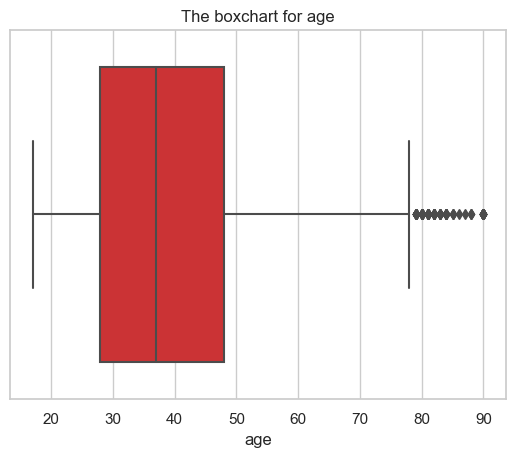

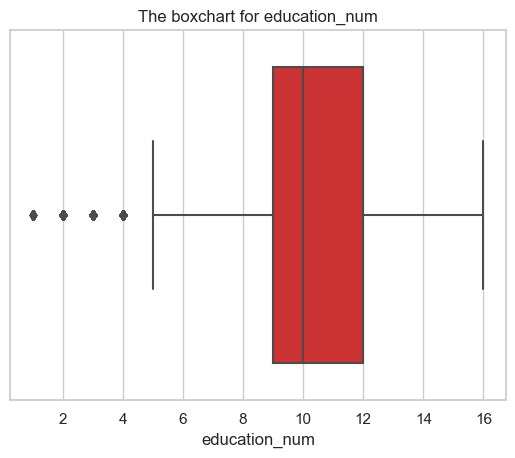

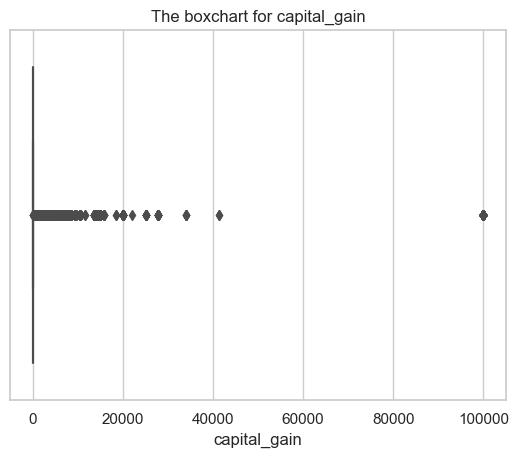

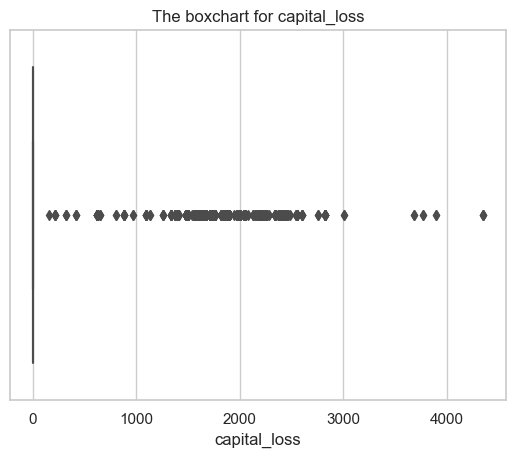

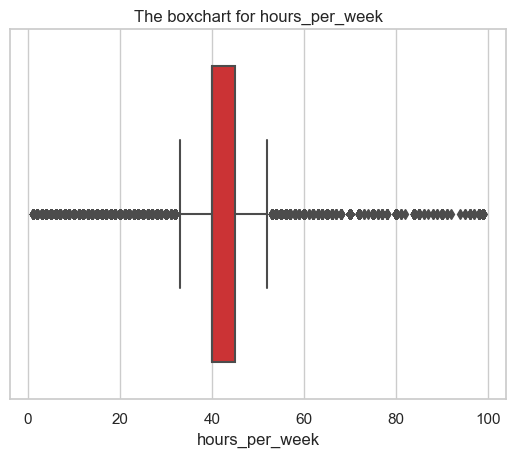

In [31]:
#Let's check for outliers in the numerical columns
for i in numerical:
    sns.boxplot(x = df[i][1:],data=df.iloc[1:], order=df[i][1:].value_counts().index, palette='Set1')
    plt.title("The boxchart for {}".format(i))
    plt.show()

We see there are few outliers in capital gain and capital loss, let's look at these plots closely

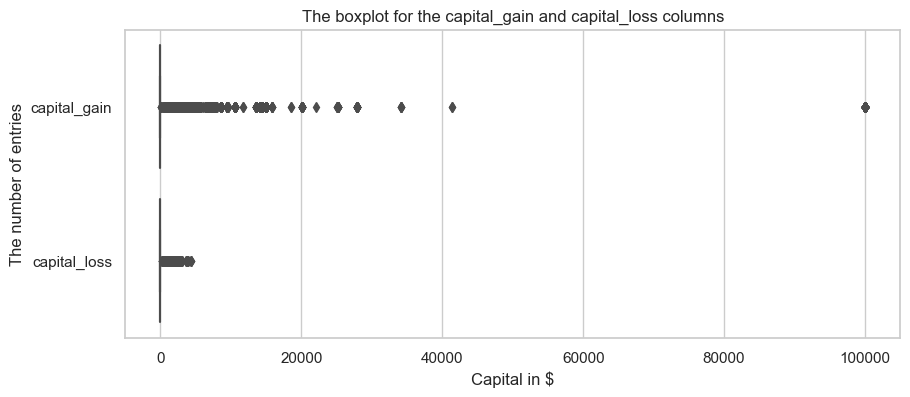

In [32]:
plt.figure(figsize=(10,4))
plt.title('The boxplot for the capital_gain and capital_loss columns')
sns.boxplot( data=df[['capital_gain','capital_loss']], orient='h')
plt.ylabel('The number of entries')
plt.xlabel('Capital in $')
plt.show()

Dropping these outliers as it can lead to the result distortion

In [33]:
abc = df.loc[df['capital_gain']>90000,'capital_gain'].index
df.drop(index=abc,inplace=True)
temp_3 = df.loc[df['capital_loss']>4000,'capital_loss'].index
df.drop(index=temp_3,inplace=True)

In [34]:
numerical

['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

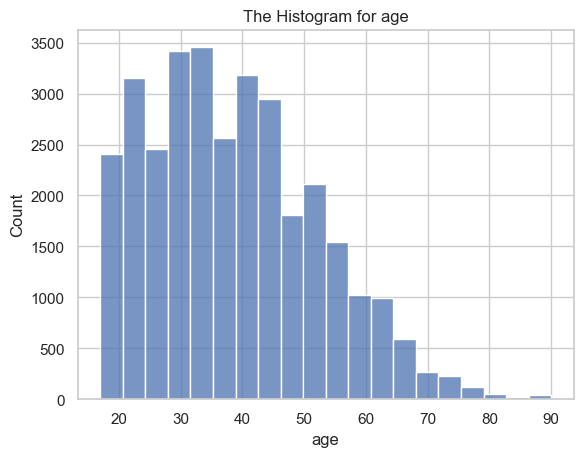

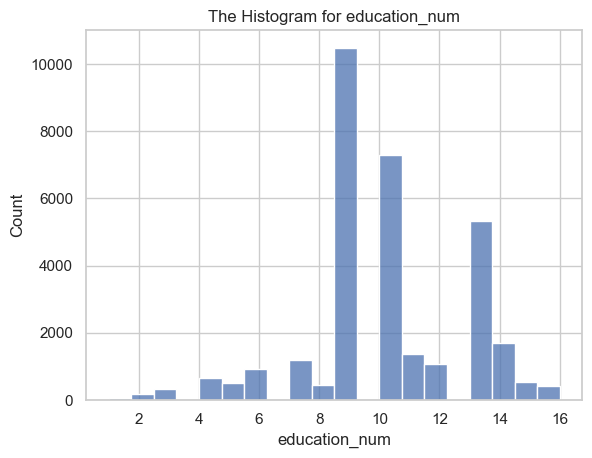

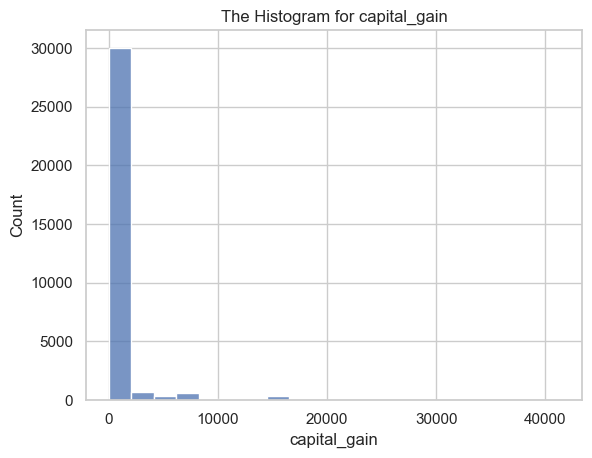

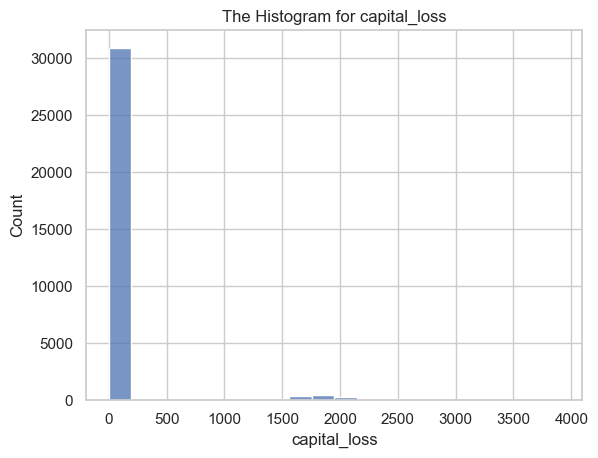

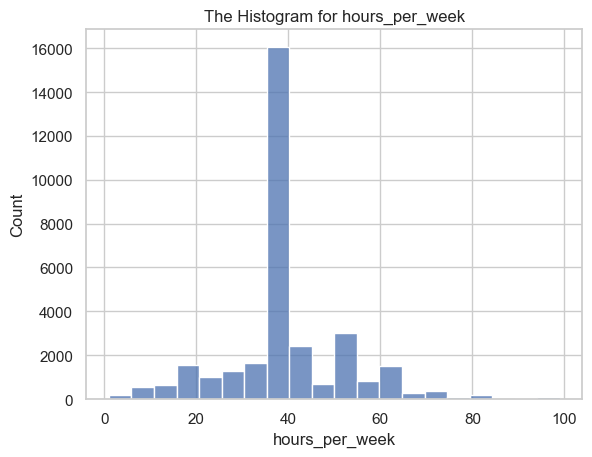

In [35]:
for i in numerical:
    sns.histplot(x=df[i], palette='Set1',bins=20)
    plt.title("The Histogram for {}".format(i))
    plt.show()

## Interpretation
Most of the people are between 20-50 age range. The graph is rightly skewed so we need to normalize it by scaling
The majority af hours per week no more than 50 h/w, and the most value is about 40 (8 hours per day).

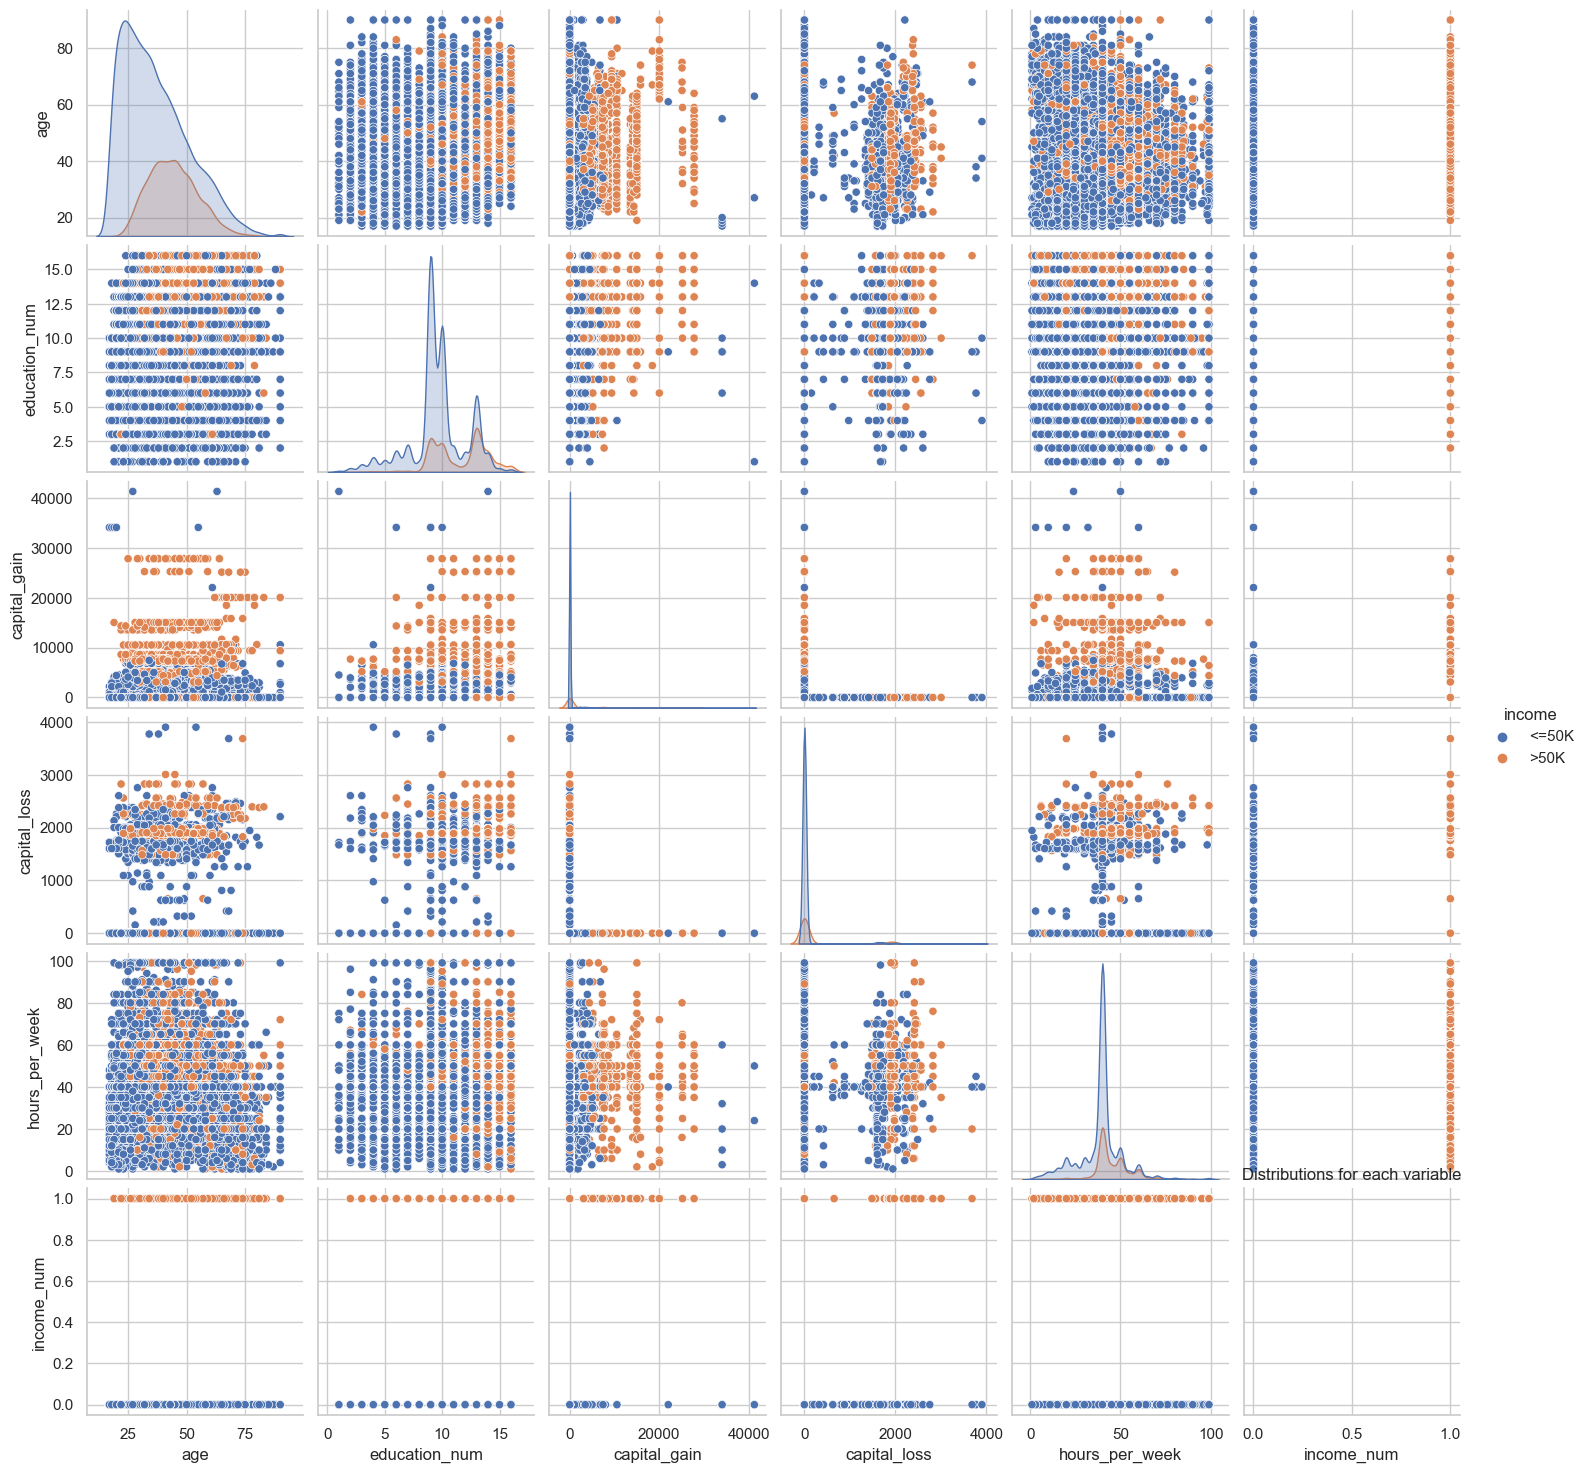

In [36]:
sns.pairplot(data=df, hue="income")
plt.title('Distributions for each variable')
plt.show()

## Categorical Columns

In [37]:
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

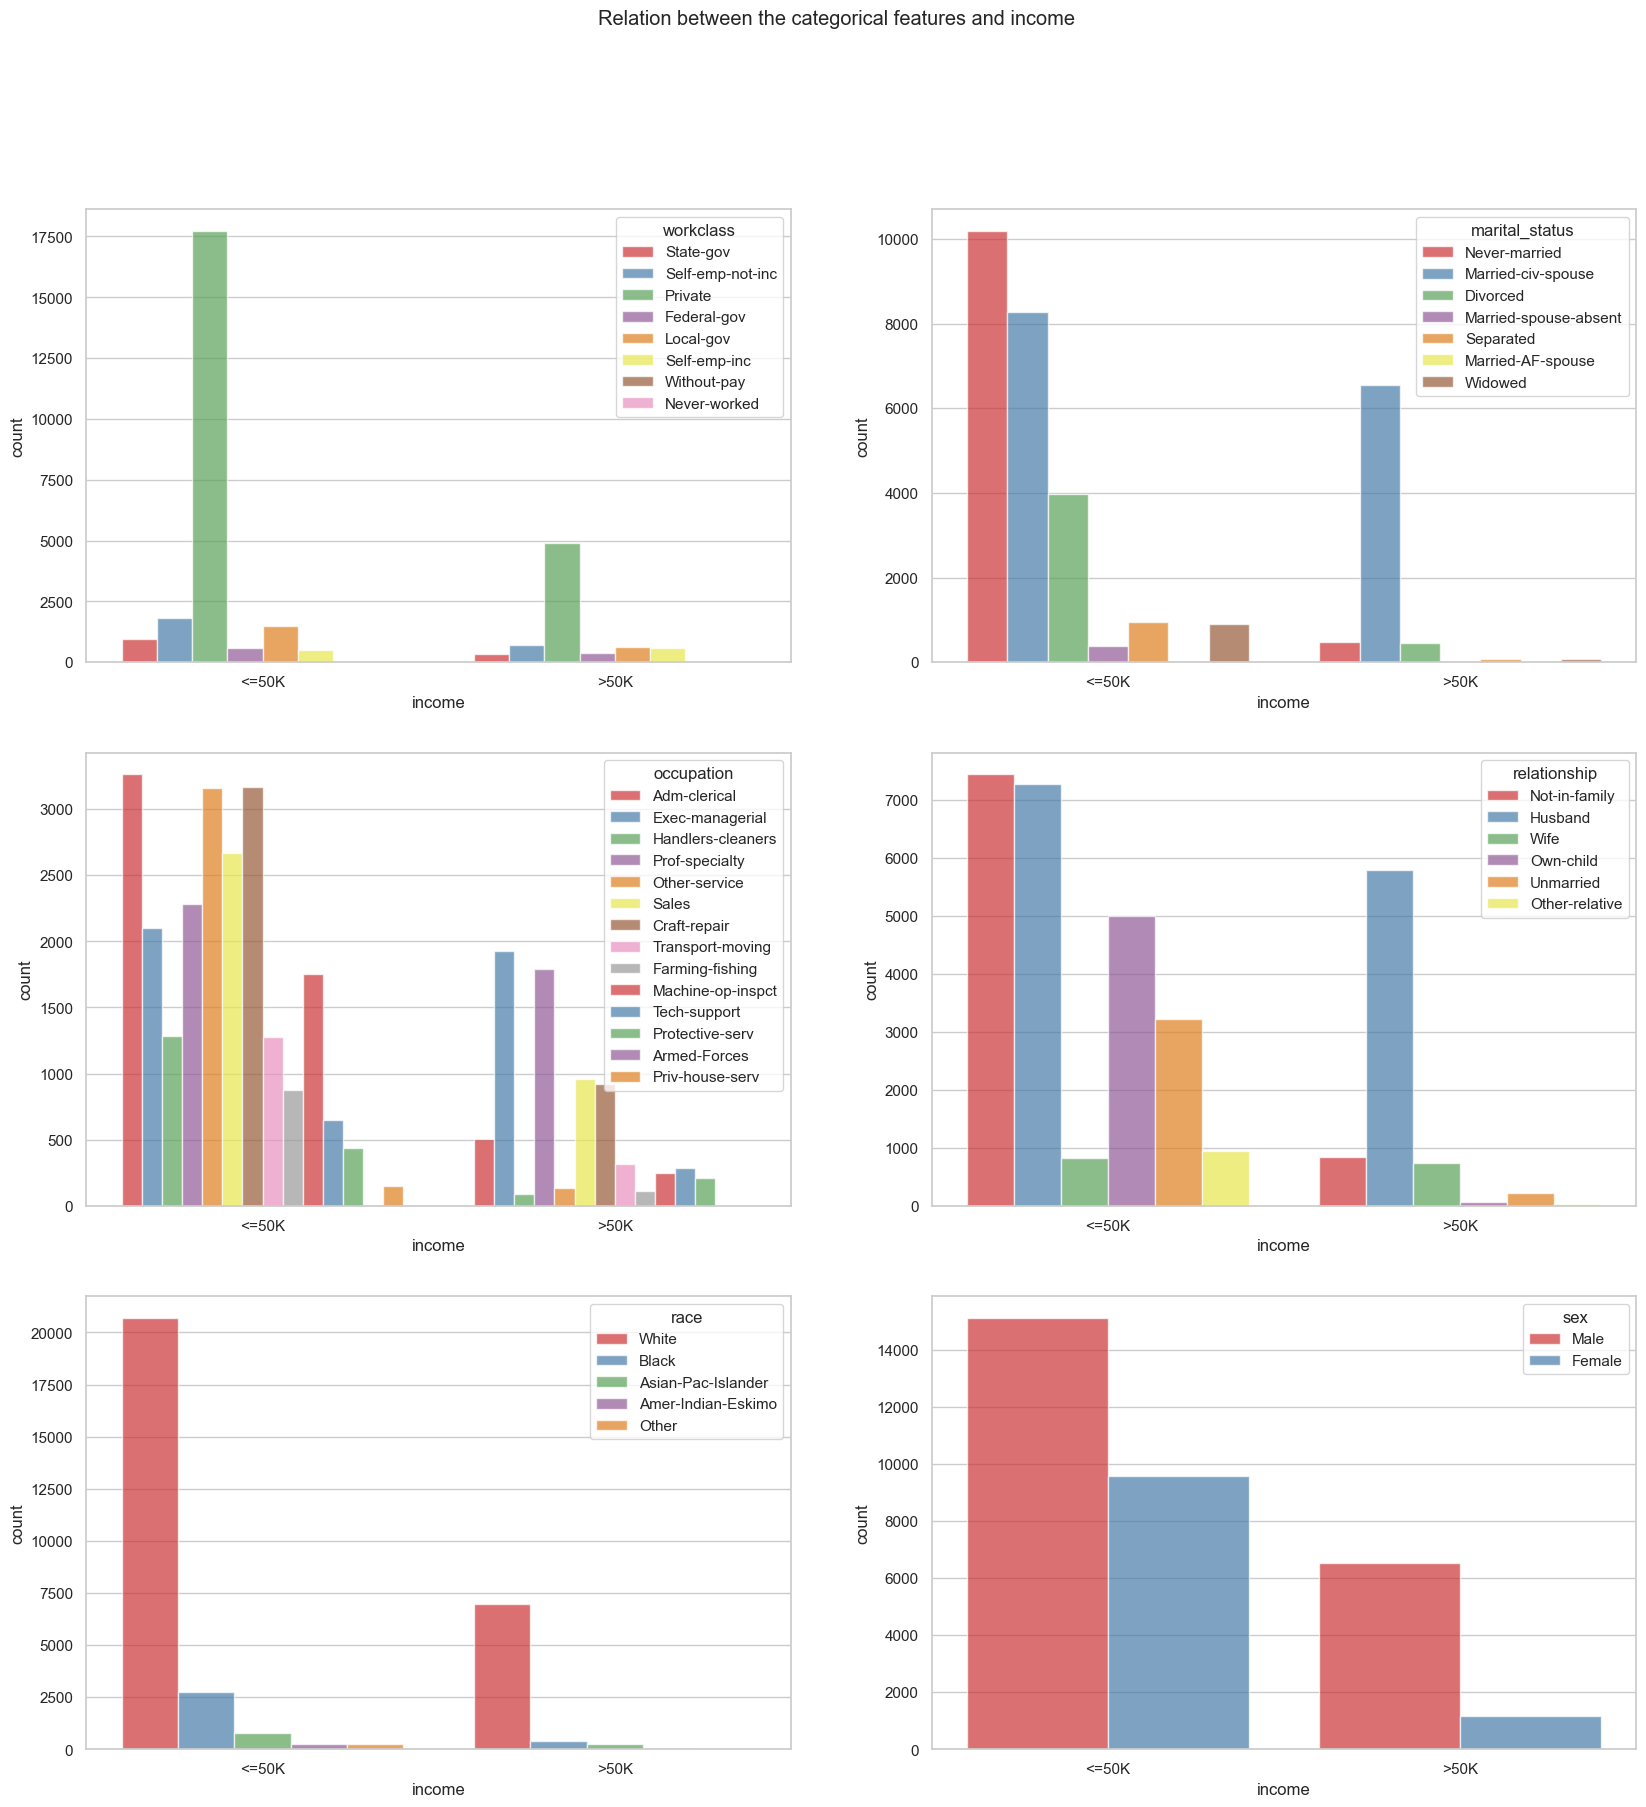

In [38]:
fig, axs = plt.subplots(3, 2, figsize=(20,20))
axs = axs.flatten()
fig.suptitle('Relation between the categorical features and income')

categorical2 = ['workclass', 'marital_status','occupation','relationship','race','sex',]
for ax, i in enumerate(categorical2):
    sns.countplot(x='income', alpha=0.7, hue=i, data=df, ax=axs[ax],palette='Set1')

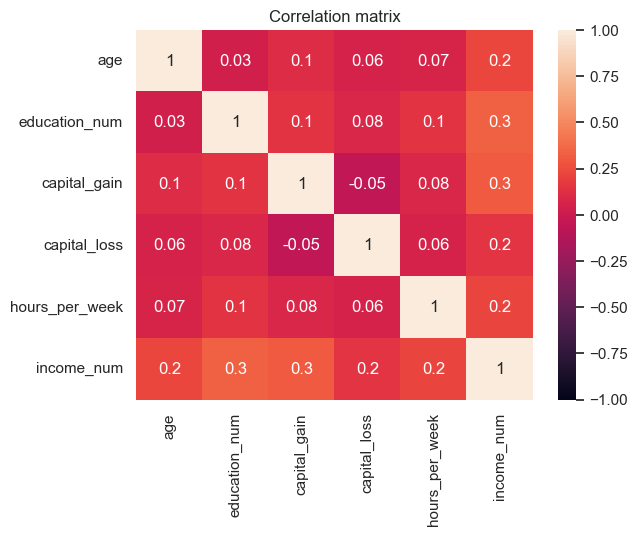

In [39]:
corr = df.corr()
#matrix = np.triu(corr)
sns.heatmap(corr, vmax=1.0, vmin=-1.0, fmt='.1g', annot=True)

plt.title('Correlation matrix')
plt.show()

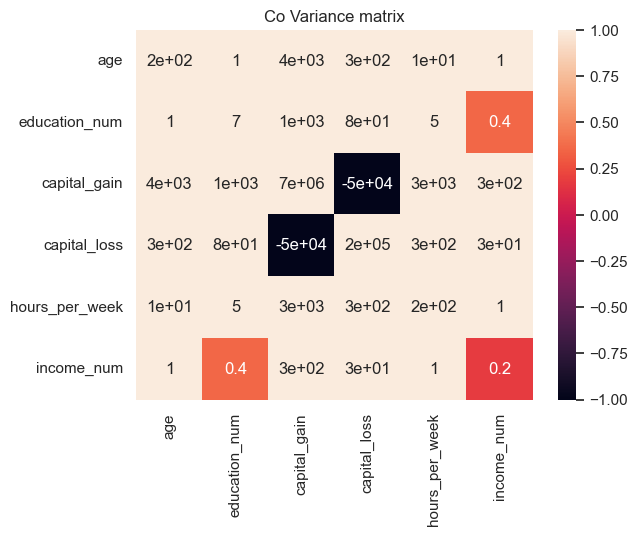

In [40]:
cov = incomeDF.cov()
sns.heatmap(cov, vmax=1.0, vmin=-1.0, fmt='.1g', annot=True)

plt.title('Co Variance matrix')
plt.show()

In [41]:
cov.columns

Index(['age', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'income_num'],
      dtype='object')

In [42]:
z_score = df[list(cov.columns)].apply(lambda col : col - np.mean(col)/np.std(col))

In [43]:
X = df.drop(columns='income')
y = df['income']

Label Encoding

In [44]:
from sklearn.preprocessing import LabelEncoder
def label_encoder(a):
    le = LabelEncoder()
    df[a] = le.fit_transform(df[a])

label_list = ['workclass', 'education','marital_status',
       'occupation', 'relationship', 'race', 'sex','native_country', 'income']
for i in label_list:
    label_encoder(i)

In [45]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_types,income_num
0,39,6,9,13,4,0,1,4,1,2174,0,40,38,0,adult,0
1,50,5,9,13,2,3,0,4,1,0,0,13,38,0,adult,0
2,38,3,11,9,0,5,1,4,1,0,0,40,38,0,adult,0
3,53,3,1,7,2,5,0,2,1,0,0,40,38,0,adult,0
4,28,3,9,13,2,9,5,2,0,0,0,40,4,0,adult,0


In [46]:
z_score_data = df[list(numerical)].apply(lambda col : col - np.mean(col)/np.std(col))
z_score_data

,age,education_num,capital_gain,capital_loss,hours_per_week
0,36.173715,9.076159,2173.768668,-0.217354,36.723897
1,47.173715,9.076159,-0.231332,-0.217354,9.723897
2,35.173715,5.076159,-0.231332,-0.217354,36.723897
3,50.173715,3.076159,-0.231332,-0.217354,36.723897
4,25.173715,9.076159,-0.231332,-0.217354,36.723897
...,...,...,...,...,...
32556,24.173715,8.076159,-0.231332,-0.217354,34.723897
32557,37.173715,5.076159,-0.231332,-0.217354,36.723897
32558,55.173715,5.076159,-0.231332,-0.217354,36.723897
32559,19.173715,5.076159,-0.231332,-0.217354,16.723897


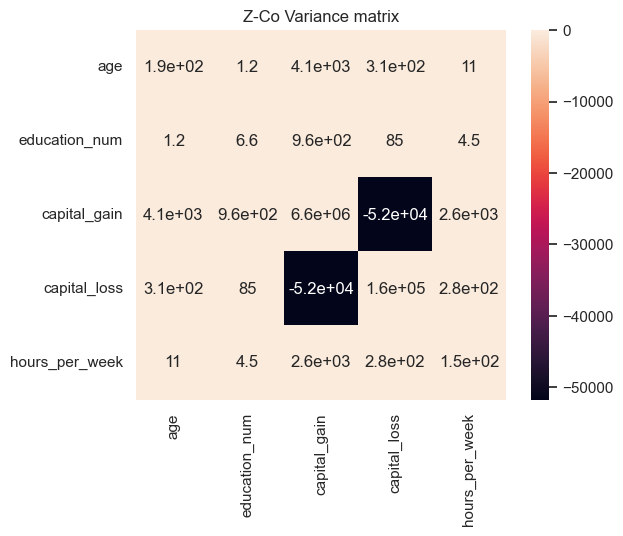

In [47]:
z_cov = pd.DataFrame.cov(z_score_data)
sns.heatmap(z_cov, vmax=1, square=True,annot=True)
plt.title('Z-Co Variance matrix')
plt.show()

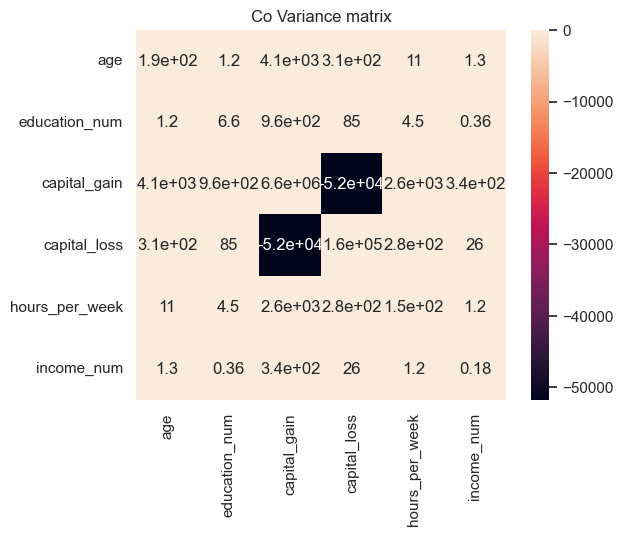

In [48]:
zcov = pd.DataFrame.cov(z_score)
sns.heatmap(zcov, vmax=1, square=True,annot=True)
plt.title('Co Variance matrix')
plt.show()

In [53]:
from sklearn.preprocessing import LabelEncoder
def label_encoder(a):
    le = LabelEncoder()
    df[a] = le.fit_transform(df[a])
    
label_list = ['workclass', 'education','marital_status',
       'occupation', 'relationship', 'race', 'sex','native_country', 'income']
for i in label_list:
    label_encoder(i)

In [54]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_types,income_num
0,39,6,9,13,4,0,1,4,1,2174,0,40,38,0,adult,0
1,50,5,9,13,2,3,0,4,1,0,0,13,38,0,adult,0
2,38,3,11,9,0,5,1,4,1,0,0,40,38,0,adult,0
3,53,3,1,7,2,5,0,2,1,0,0,40,38,0,adult,0
4,28,3,9,13,2,9,5,2,0,0,0,40,4,0,adult,0


In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(df.drop(['income','age_types','income_num'],axis=1))
scaled_features = scaler.transform(df.drop(['income','age_types','income_num'],axis=1))
columns=['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country']
df_scaled = pd.DataFrame(scaled_features,columns=columns)
df_scaled.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0.301370,0.750,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.052626,0.0,0.397959,0.926829
1,0.452055,0.625,0.600000,0.800000,0.333333,0.214286,0.0,1.0,1.0,0.000000,0.0,0.122449,0.926829
2,0.287671,0.375,0.733333,0.533333,0.000000,0.357143,0.2,1.0,1.0,0.000000,0.0,0.397959,0.926829
3,0.493151,0.375,0.066667,0.400000,0.333333,0.357143,0.0,0.5,1.0,0.000000,0.0,0.397959,0.926829
4,0.150685,0.375,0.600000,0.800000,0.333333,0.642857,1.0,0.5,0.0,0.000000,0.0,0.397959,0.097561


## Model bulding

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [61]:
X = df_scaled
y= df.income

In [62]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,y)

In [64]:
X_res.shape,y_res.shape
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 24717, 1: 7682})
Resampled dataset shape Counter({0: 24089, 1: 24089})


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=101,shuffle=True)

In [66]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (38542, 13)
X_test shape: (9636, 13)
y_train shape: (38542,)
y_test shape: (9636,)


In [67]:
# To store results of models
result_dict_train = {}
result_dict_test = {}

In [69]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
svc = SVC(random_state = 101)
accuracies = cross_val_score(svc, X_train, y_train, cv=5)
svc.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(X_test,y_test))

Train Score: 0.8343364628905767
Test Score: 0.8295973432959735


In [70]:
result_dict_train["SVM Default Train Score"] = np.mean(accuracies)
result_dict_test["SVM Default Test Score"] = svc.score(X_test,y_test)

In [71]:
y_pred_test=svc.predict(X_test)

In [72]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[3782 1109]
 [ 533 4212]]

True Positives(TP) =  3782

True Negatives(TN) =  4212

False Positives(FP) =  1109

False Negatives(FN) =  533


The confusion matrix shows `3782 + 4212 = 7,994 correct predictions` and `1109 + 533 = 1,642 incorrect predictions`.
In this case, we have
- `True Positives` (Actual Positive:1 and Predict Positive:1) - 3782
- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 4212
- `False Positives` (Actual Negative:0 but Predict Positive:1) - 1109 `(Type I error)`
- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 533 `(Type II error)`

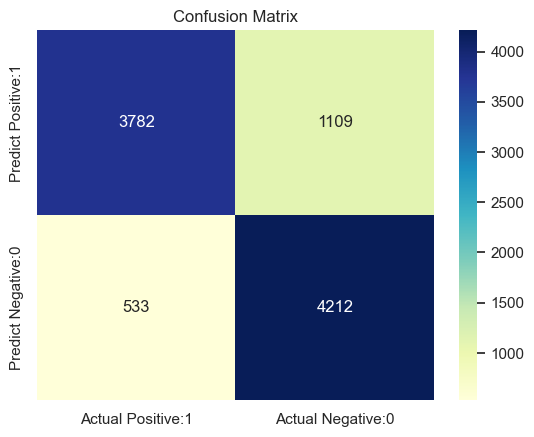

In [74]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.show()

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      4891
           1       0.79      0.89      0.84      4745

    accuracy                           0.83      9636
   macro avg       0.83      0.83      0.83      9636
weighted avg       0.83      0.83      0.83      9636



In [76]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))
# print precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 0.8296
Classification error : 0.1704
Precision : 0.7733
Recall or Sensitivity : 0.8765
True Positive Rate : 0.8765
False Positive Rate : 0.2084
Specificity : 0.7916


### ROC Curve
Another tool to measure the classification model performance visually is **ROC Curve**. ROC Curve stands for **Receiver Operating Characteristic Curve**. An **ROC Curve** is a plot which shows the performance of a classification model at various 
classification threshold levels. <br>
The **ROC Curve** plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold levels.<br>
**True Positive Rate (TPR)** is also called **Recall**. It is defined as the ratio of `TP to (TP + FN)`.<br>
**False Positive Rate (FPR)** is defined as the ratio of `FP to (FP + TN)`.<br>
In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).

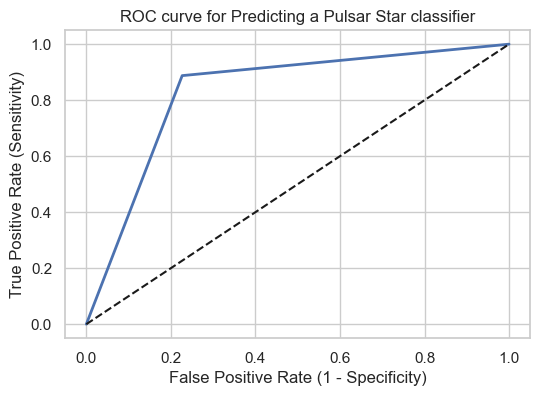

In [77]:
# plot ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Pulsar Star classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()


### ROC  AUC

**ROC AUC** stands for **Receiver Operating Characteristic - Area Under Curve**. It is a technique to compare classifier performance. In this technique, we measure the `area under the curve (AUC)`. A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. 


So, **ROC AUC** is the percentage of the ROC plot that is underneath the curve.

In [78]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_test)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8305


In [79]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(svc, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9149
